# スタックとキュー

スタックとキューは python の場合，`List` もしくは `collections.deque` で実現できるので，とりあえずそっちを使ってみます．

In [1]:
from collections import deque
import timeit

## スタックに関して

本体を ADT として定義（基本 `push()` と `pop()` を用意すれば良い）

In [2]:
# ここが本体
# とりあえず，スタックの ADT として， push と pop を定義する

def push(stack, x):
    stack.append(x)
    
def pop(stack):
    return stack.pop()

# ここからは，計測用の関数

def push_trial(size, stack):
    for i in range(10**size): # サイズは10のべきで測る
        push(stack, i)
        
def pop_trial(size, stack):
    for i in range(10**size):
        pop(stack)
    

# list と deque で時間計測
stack_with_list = []
stack_with_deque = deque([])
    
time_push_list = timeit.timeit(lambda: push_trial(5, stack_with_list), number=10)
time_push_deque = timeit.timeit(lambda: push_trial(5, stack_with_deque), number=10)
time_pop_list = timeit.timeit(lambda: pop_trial(5, stack_with_list), number=10)
time_pop_deque = timeit.timeit(lambda: pop_trial(5, stack_with_deque), number=10)

print(time_push_list, time_push_deque)
print(time_pop_list, time_pop_deque)

0.10829154099337757 0.08512425000662915
0.07877258298685774 0.07887387499795295


In [3]:
# じゃあ，あとはデータとって時間計測の結果をグラフにしてみる

import pandas as pd

data_list = []
for size in range(1, 6):
    time_push_list = timeit.timeit(lambda: push_trial(size, stack_with_list), number=10)
    time_push_deque = timeit.timeit(lambda: push_trial(size, stack_with_deque), number=10)
    time_pop_list = timeit.timeit(lambda: pop_trial(size, stack_with_list), number=10)
    time_pop_deque = timeit.timeit(lambda: pop_trial(size, stack_with_deque), number=10)
    data_list.append({'size': size, 
               'push_list': time_push_list, 
               'pop_list': time_pop_list, 
               'push_deque': time_push_deque, 
               'pop_deque': time_pop_deque})

df = pd.DataFrame(data_list)

df.head()


,size,push_list,pop_list,push_deque,pop_deque
0,1,0.000016,0.000012,0.000013,0.000011
1,2,0.000076,0.000068,0.000073,0.000067
2,3,0.000787,0.000701,0.000807,0.000713
3,4,0.008227,0.007456,0.007669,0.007238
4,5,0.081215,0.078471,0.079761,0.088419


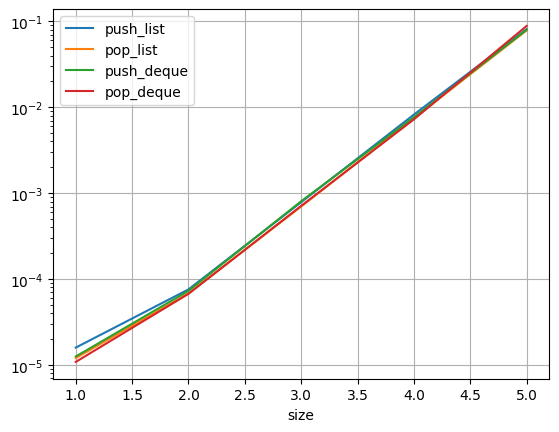

In [4]:
import matplotlib.pylab as plt

df.plot(x='size', y=['push_list', 'pop_list', 'push_deque', 'pop_deque'], logy=True)
plt.grid()

## キューに関して

本体を ADT として定義（基本 `enq()` と `deq()` を用意すれば良い）

In [5]:
# ここが本体
# とりあえず，キューの ADT として， enq() と deq() を定義する

# ただし `list` と， `collections.deque` で取り出し方が違う．
def enq(queue, x):
    queue.append(x)
    
def deq_list(queue):
    return queue.pop(0) # 先頭を取り出すので，pop(0) でよい

def deq_deque(queue):
    return queue.popleft() # 先頭を取り出す場合 popleft() で


# ここからは，計測用の関数

def enq_trial(size, queue):
    for i in range(10**size): # サイズは10のべきで測る
        enq(queue, i)
        
def deq_list_trial(size, queue):
    for i in range(10**size):
        deq_list(queue)
    
def deq_deque_trial(size, queue):
    for i in range(10**size):
        deq_deque(queue)


# list と deque で時間計測
queue_with_list = []
queue_with_deque = deque([])
    
time_enq_list = timeit.timeit(lambda: enq_trial(5, queue_with_list), number=10)
time_enq_deque = timeit.timeit(lambda: enq_trial(5, queue_with_deque), number=10)
time_deq_list = timeit.timeit(lambda: deq_list_trial(5, queue_with_list), number=10)
time_deq_deque = timeit.timeit(lambda: deq_deque_trial(5, queue_with_deque), number=10)
print(time_enq_list, time_enq_deque)
print(time_deq_list, time_deq_deque)

0.10620991699397564 0.08272245799889788
83.94517083402025 0.08391025001765229


うん，`list` 使ったキューはやばそう．
グラフにしてみよう

In [6]:
import pandas as pd

data_list = []
for size in range(1, 6):
    time_enq_list = timeit.timeit(lambda: enq_trial(size, queue_with_list), number=10)
    time_enq_deque = timeit.timeit(lambda: enq_trial(size, queue_with_deque), number=10)
    time_deq_list = timeit.timeit(lambda: deq_list_trial(size, queue_with_list), number=10)
    time_deq_deque = timeit.timeit(lambda: deq_deque_trial(size, queue_with_deque), number=10)
    data_list.append({'size': size, 
               'enq_list': time_enq_list, 
               'deq_list': time_deq_list, 
               'enq_deque': time_enq_deque, 
               'deq_deque': time_deq_deque})

df = pd.DataFrame(data_list)

df.head()


,size,enq_list,deq_list,enq_deque,deq_deque
0,1,0.000029,0.000030,0.000024,0.000025
1,2,0.000157,0.000277,0.000151,0.000152
2,3,0.002018,0.014716,0.001595,0.002435
3,4,0.013311,0.838780,0.012392,0.008055
4,5,0.080338,84.299931,0.079171,0.086331


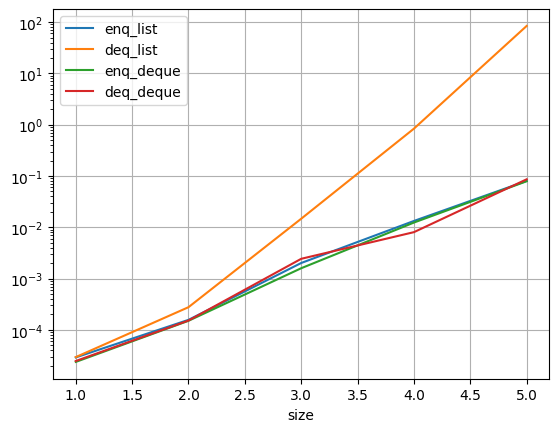

In [7]:
import matplotlib.pylab as plt

df.plot(x='size', y=['enq_list', 'deq_list', 'enq_deque', 'deq_deque'], logy=True)
plt.grid()

`i == 5` で，縦軸で 3 くらい違うので，おおよそ 10^3 = 1000倍近い差が `deq_list()` で出ている．
ということで，キューを使う場合は `list` で実装してはあかんということになるかな．